<a href="https://colab.research.google.com/github/Ronitbera/Bike_price/blob/main/Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Distribution of used bike prices**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/bikes.csv")

In [3]:
def extract_numeric(value):
    try:
        return float(''.join(c for c in str(value) if c.isdigit() or c == '.'))
    except:
        return None

df['mileage_cleaned'] = df['mileage'].apply(extract_numeric)
df['power_cleaned'] = df['power'].apply(extract_numeric)
df['kms_cleaned'] = df['kms_driven'].apply(extract_numeric)

In [4]:
df['brand'] = df['model_name'].apply(lambda x: str(x).split()[0])

df['price'] = pd.to_numeric(df['price'], errors='coerce')

filtered_df = df.dropna(subset=['price', 'brand', 'location'])

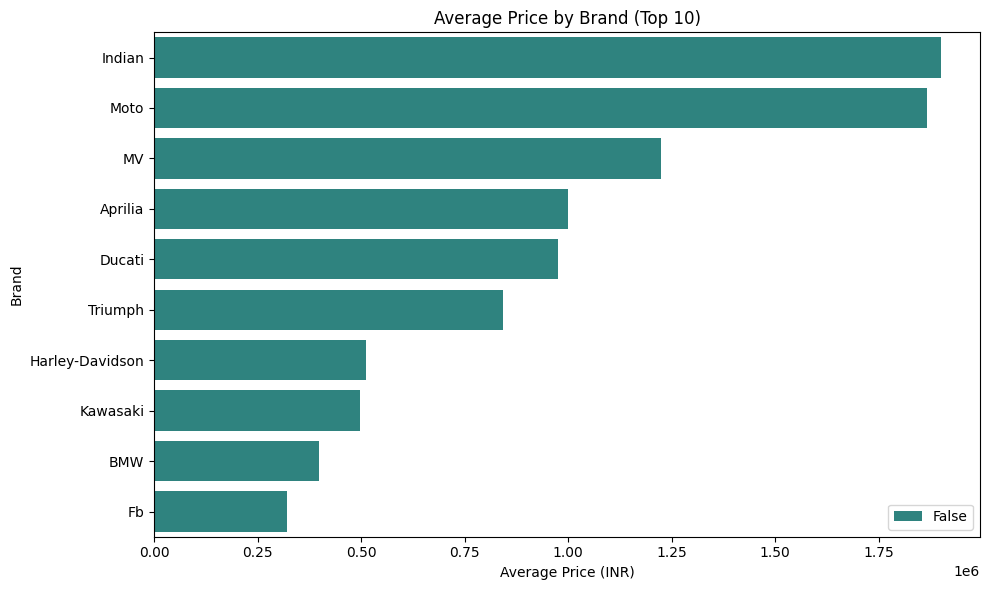

In [6]:
top_brands = (
    filtered_df.groupby('brand')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis",hue=False)
plt.title("Average Price by Brand (Top 10)")
plt.xlabel("Average Price (INR)")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

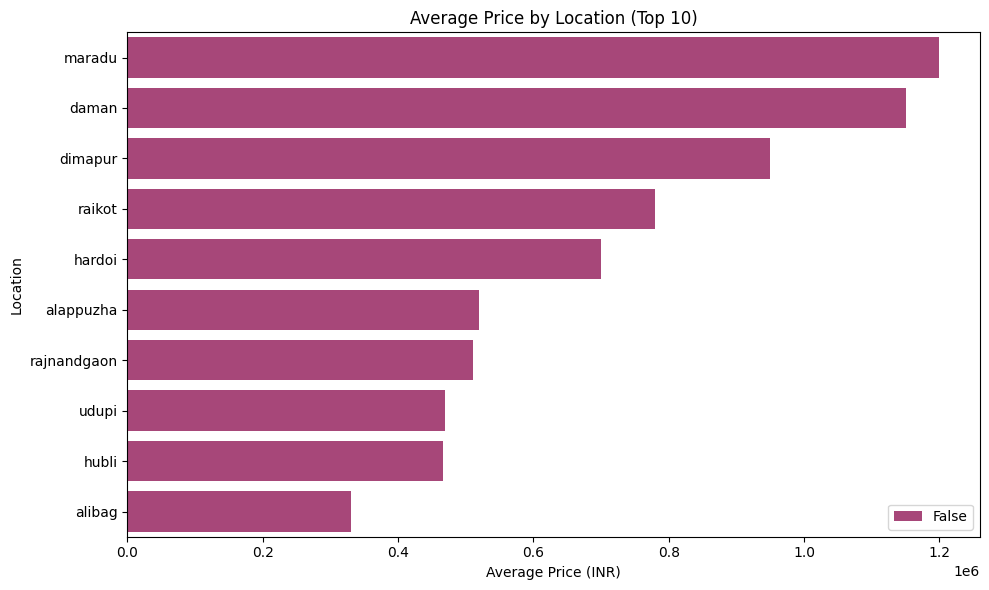

In [8]:
top_locations = (
    filtered_df.groupby('location')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma",hue=False)
plt.title("Average Price by Location (Top 10)")
plt.xlabel("Average Price (INR)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()